['__globals__', '__header__', '__version__', 'cap', 'col_cell_label', 'curr', 'row_diag_number', 'time', 'vcell']


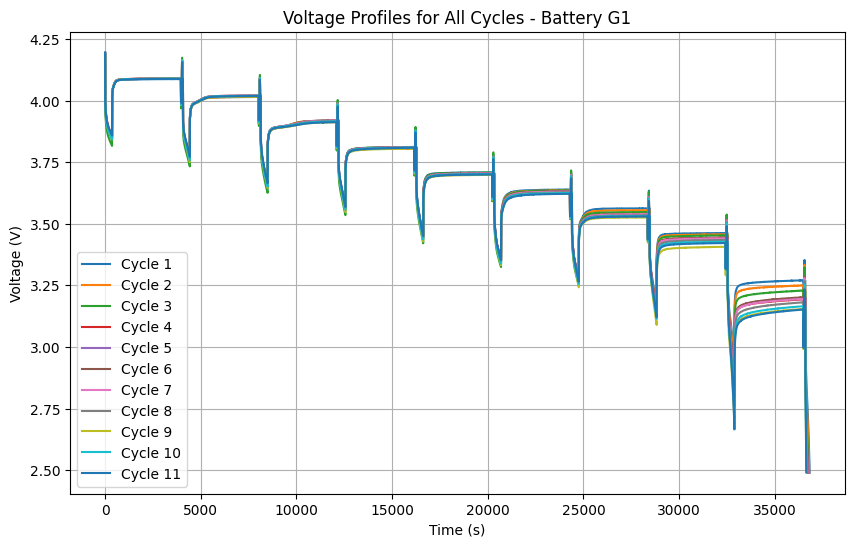

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('HPPC_test.mat')
print(sorted(mat.keys()))

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

# Voltage plot
plt.figure(figsize=(10, 6))
for i, vcell_cycle in enumerate(vcell):
    if vcell_cycle.size > 1 and not np.isnan(vcell_cycle).all():  # Skip empty or NaN rows
        vcell = vcell_cycle[~np.isnan(vcell_cycle)].reshape(-1)  # Remove NaN and flatten
        plt.plot(vcell, label=f"Cycle {i+1}")

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title(f"Voltage Profiles for All Cycles - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

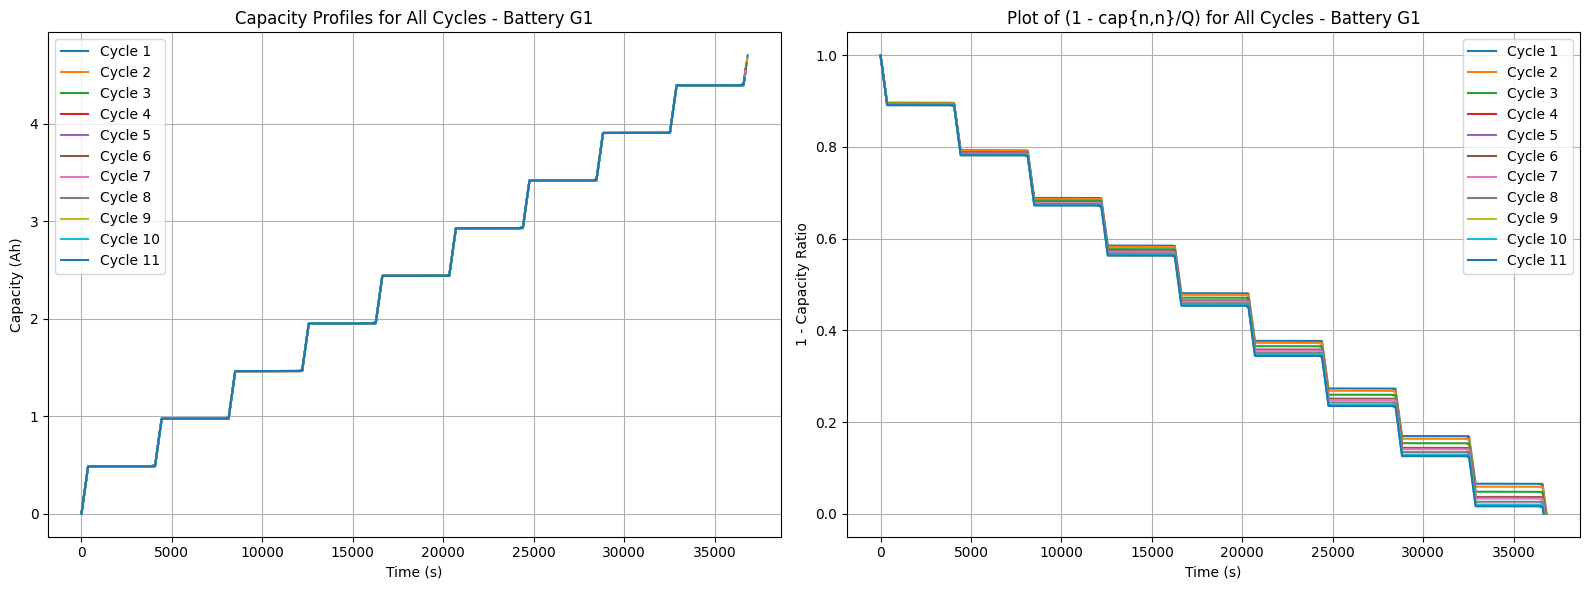

[Q] Last capacity value of each cycle:
Cycle 1: 4.7020180161794025
Cycle 2: 4.669648041261567
Cycle 3: 4.615839233265983
Cycle 4: 4.56053246974945
Cycle 5: 4.557819279564751
Cycle 6: 4.557838889426655
Cycle 7: 4.544314201143052
Cycle 8: 4.51208200706376
Cycle 9: 4.471657842066553
Cycle 10: 4.483806274334589
Cycle 11: 4.466178816954295


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('HPPC_test.mat')

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

# Initialize Q to store the last capacity of each cycle
Q = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Capacity profiles for all cycles
for i, capacity_cycle in enumerate(cap):
    if capacity_cycle.size > 1 and not np.isnan(capacity_cycle).all():  # Skip empty or NaN rows
        cap_cycle = capacity_cycle[~np.isnan(capacity_cycle)].reshape(-1)  # Remove NaN and flatten
        Q.append(cap_cycle[-1])  # Append the last value of the capacity cycle
        ax1.plot(cap_cycle, label=f"Cycle {i+1}")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Capacity (Ah)")
ax1.set_title(f"Capacity Profiles for All Cycles - Battery {battery_label}")
ax1.legend()
ax1.grid(True)

# Plot 2: (1 - cap{n,n}/Q) for each cycle
for i, capacity_cycle in enumerate(cap):
    if capacity_cycle.size > 1 and not np.isnan(capacity_cycle).all():  # Skip empty or NaN rows
        cap_cycle = capacity_cycle[~np.isnan(capacity_cycle)].reshape(-1)  # Remove NaN and flatten
        ratio = 1 - (cap_cycle / Q[i])  # Compute 1 - cap{n,n}/Q for the current cycle
        ax2.plot(ratio, label=f"Cycle {i+1}")

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("1 - Capacity Ratio")
ax2.set_title(f"Plot of (1 - cap{{n,n}}/Q) for All Cycles - Battery {battery_label}")
ax2.legend()
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Print Q with associated cycling test
print("[Q] Last capacity value of each cycle:")
for cycle_num, q_value in enumerate(Q, start=1):
    print(f"Cycle {cycle_num}: {q_value}")


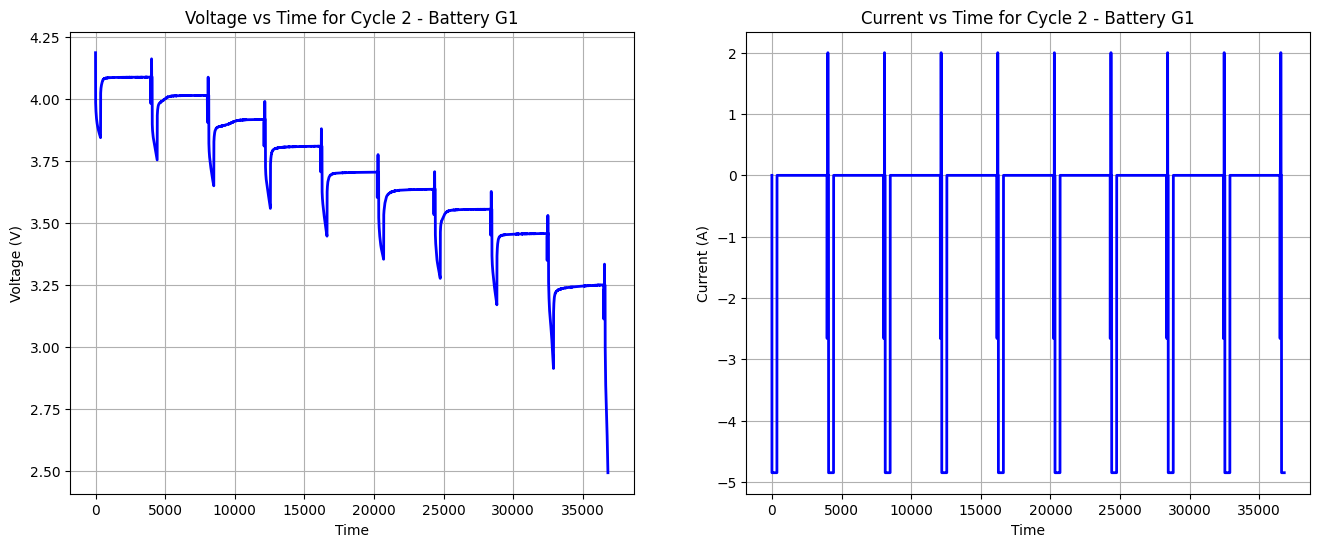

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

mat = sio.loadmat('HPPC_test.mat')

# Define the battery label and cycle number
battery_label = 'G1'
cycle_number = 1

# Select the data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract data for the specific cycle
vcell_cycle = mat['vcell'][cycle_number][col_index]
current_cycle = mat['curr'][cycle_number][col_index]

# Ensure data is 1-dimensional
vcell_cycle = np.array(vcell_cycle).flatten()
current_cycle = np.array(current_cycle).flatten()

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices]

# Create time vector based on valid data points
time_vector = np.arange(len(vcell_cycle)) # its acctully sample nums

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(time_vector, vcell_cycle, 'b-', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Voltage vs Time for Cycle {cycle_number + 1} - Battery {battery_label}')
ax1.grid(True)

ax2.plot(time_vector, current_cycle, 'b-', linewidth=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Current (A)')
ax2.set_title(f'Current vs Time for Cycle {cycle_number + 1} - Battery {battery_label}')
ax2.grid(True)

plt.show()

Found 10 main pulse sequences
Pulse start indices: [    0  3962  8028 12094 16160 20226 24292 28358 32424 36490]


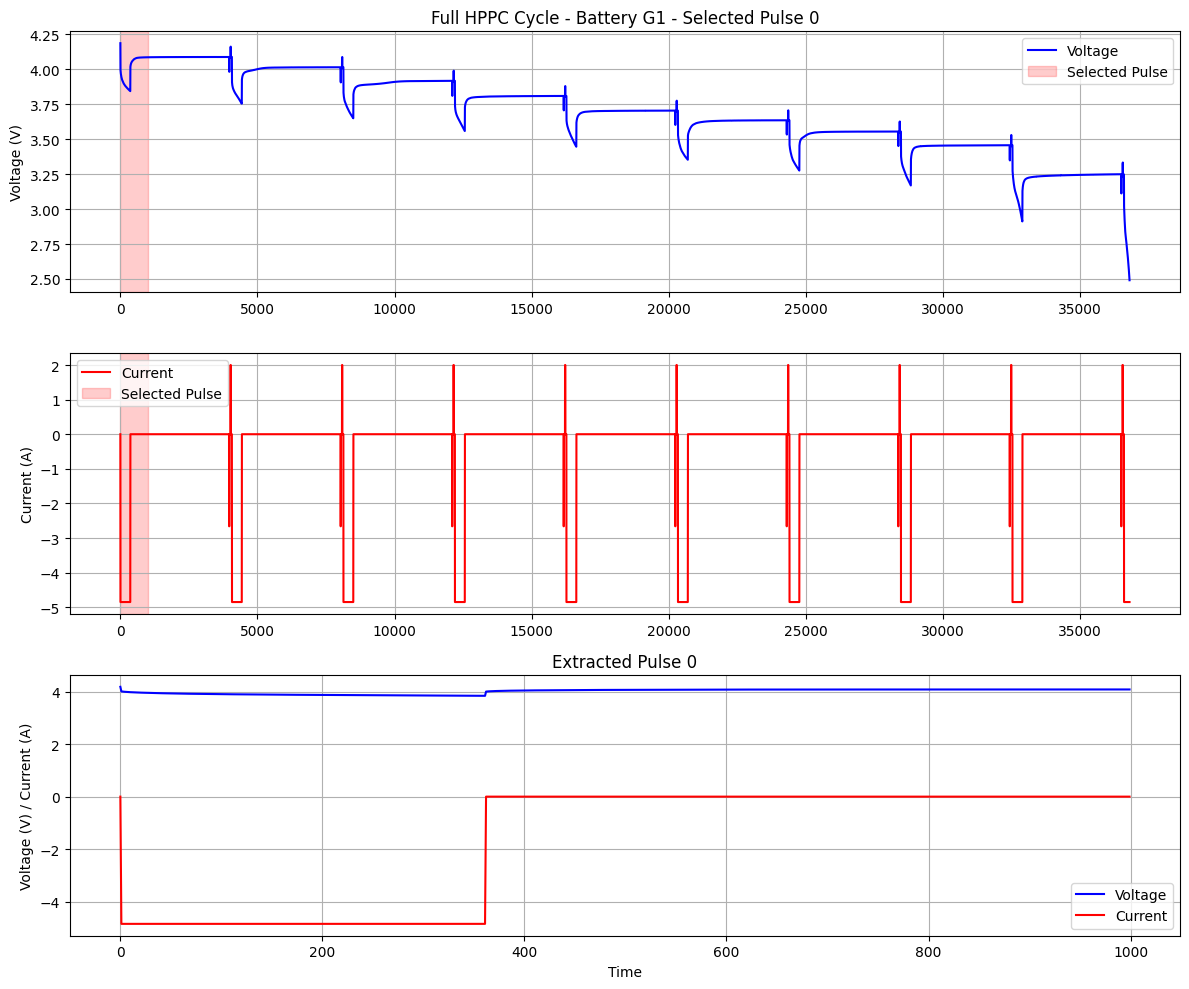


Pulse 0 characteristics:
Start index: 0
Pulse duration: 1000 points
Voltage drop during pulse: 0.343V
Peak current: 4.85A


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

def extract_pulse(current, voltage, time, start_idx, window_size=1000):
    """
    Extract a pulse sequence from HPPC data.
    
    Args:
        current: Current data array
        voltage: Voltage data array
        time: Time vector
        start_idx: Starting index for the pulse
        window_size: Number of points to extract
    
    Returns:
        Tuple of (time_pulse, current_pulse, voltage_pulse)
    """
    end_idx = min(start_idx + window_size, len(current))
    
    return (
        time[start_idx:end_idx],
        current[start_idx:end_idx],
        voltage[start_idx:end_idx]
    )

def find_main_pulses(current, min_distance=1000):
    """
    Find main pulse starts while avoiding multiple detections within the same pulse sequence.
    
    Args:
        current: Current data array
        min_distance: Minimum distance between pulses
    
    Returns:
        Array of pulse start indices
    """
    # Find all significant current changes
    current_threshold = 0.1
    all_changes = np.where(np.abs(np.diff(current)) > current_threshold)[0]
    
    # Filter to keep only the start of each main pulse sequence
    main_pulses = []
    last_pulse = -min_distance  # Initialize with negative distance
    
    for idx in all_changes:
        if idx - last_pulse >= min_distance:
            main_pulses.append(idx)
            last_pulse = idx
    
    return np.array(main_pulses)

# Load and prepare data
mat = sio.loadmat('HPPC_test.mat')
battery_label = 'G1'
cycle_number = 1

# Select data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract data for the specific cycle
vcell_cycle = np.array(mat['vcell'][cycle_number][col_index]).flatten()
current_cycle = np.array(mat['curr'][cycle_number][col_index]).flatten()

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices]
time_vector = np.arange(len(vcell_cycle))

# Find main pulse sequences
pulse_starts = find_main_pulses(current_cycle)

# Parameters you can modify:
pulse_number = 0
window_size = 1000 

# Print available pulses
print(f"Found {len(pulse_starts)} main pulse sequences")
print(f"Pulse start indices: {pulse_starts[:10]}")  

# Extract the selected pulse
selected_start = pulse_starts[pulse_number]
time_pulse, current_pulse, voltage_pulse = extract_pulse(
    current_cycle, vcell_cycle, time_vector, selected_start, window_size
)

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot full cycle data and highlight selected pulse
ax1.plot(time_vector, vcell_cycle, 'b-', label='Voltage')
ax1.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Full HPPC Cycle - Battery {battery_label} - Selected Pulse {pulse_number}')
ax1.grid(True)
ax1.legend()

ax2.plot(time_vector, current_cycle, 'r-', label='Current')
ax2.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax2.set_ylabel('Current (A)')
ax2.grid(True)
ax2.legend()

# Plot extracted pulse
ax3.plot(time_pulse, voltage_pulse, 'b-', label='Voltage')
ax3.plot(time_pulse, current_pulse, 'r-', label='Current')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage (V) / Current (A)')
ax3.set_title(f'Extracted Pulse {pulse_number}')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

# Print pulse characteristics
print(f"\nPulse {pulse_number} characteristics:")
print(f"Start index: {selected_start}")
print(f"Pulse duration: {len(time_pulse)} points")
print(f"Voltage drop during pulse: {voltage_pulse.max() - voltage_pulse.min():.3f}V")
print(f"Peak current: {np.abs(current_pulse).max():.2f}A")

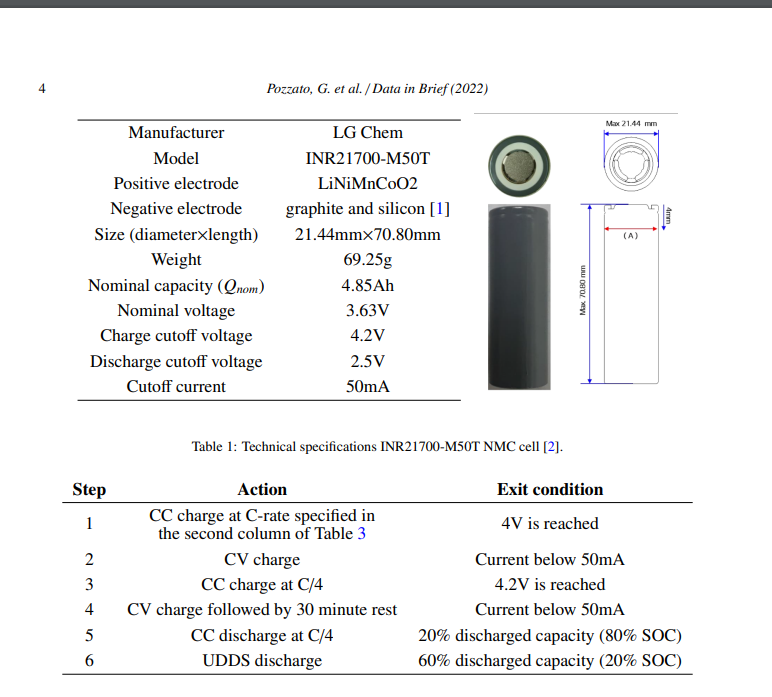

Found 10 main pulse sequences
Pulse start indices: [    0  3962  8028 12094 16160 20226 24292 28358 32424 36490]


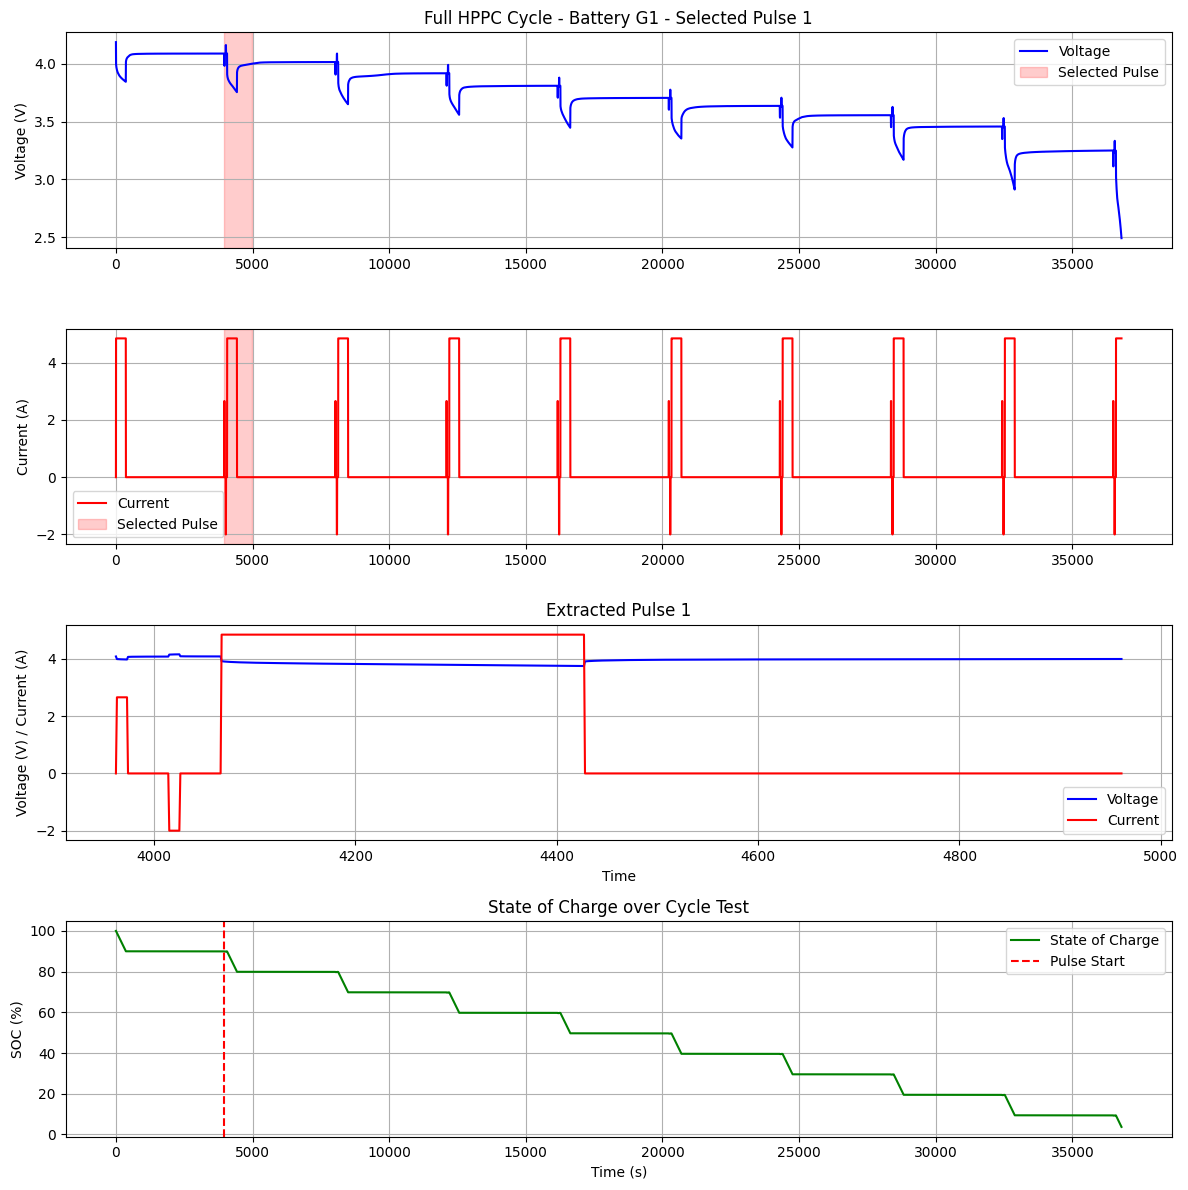


Pulse 1 characteristics:
Start index: 3962
Pulse duration: 1000 points
Voltage drop during pulse: 0.408V
Peak current: 4.85A
Inital SoC: 89.97192262101146
Final SoC: 79.90225226062543


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

def extract_pulse(current, voltage, time, start_idx, window_size=1000):
    """
    Extract a pulse sequence from HPPC data.
    
    Args:
        current: Current data array
        voltage: Voltage data array
        time: Time vector
        start_idx: Starting index for the pulse
        window_size: Number of points to extract
    
    Returns:
        Tuple of (time_pulse, current_pulse, voltage_pulse)
    """
    end_idx = min(start_idx + window_size, len(current))
    return (
        time[start_idx:end_idx],
        current[start_idx:end_idx],
        voltage[start_idx:end_idx]
    )

def find_main_pulses(current, min_distance=1000):
    """
    Find main pulse starts while avoiding multiple detections within the same pulse sequence.
    
    Args:
        current: Current data array
        min_distance: Minimum distance between pulses
    
    Returns:
        Array of pulse start indices
    """
    # Find all significant current changes
    current_threshold = 0.1
    all_changes = np.where(np.abs(np.diff(current)) > current_threshold)[0]
    
    # Filter to keep only the start of each main pulse sequence
    main_pulses = []
    last_pulse = -min_distance  # Initialize with negative distance
    
    for idx in all_changes:
        if idx - last_pulse >= min_distance:
            main_pulses.append(idx)
            last_pulse = idx
    return np.array(main_pulses)

# Load and prepare data
mat = sio.loadmat('HPPC_test.mat')
battery_label = 'G1'
cycle_number = 1

# Select data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract data for the specific cycle
vcell_cycle = np.array(mat['vcell'][cycle_number][col_index]).flatten()
current_cycle = (np.array(mat['curr'][cycle_number][col_index]).flatten()) * -1

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices] 
time_vector = np.arange(len(vcell_cycle))

# Find main pulse sequences
pulse_starts = find_main_pulses(current_cycle)

# Parameters you can modify:
pulse_number = 1
window_size = 1000 

# Print available pulses
print(f"Found {len(pulse_starts)} main pulse sequences")
print(f"Pulse start indices: {pulse_starts[:10]}")  

# Extract the selected pulse
selected_start = pulse_starts[pulse_number]
time_pulse, current_pulse, voltage_pulse = extract_pulse(
    current_cycle, vcell_cycle, time_vector, selected_start, window_size
)

# Calculate state of charge (SOC) over the entire cycle using coulomb counting.
# We assume:
#   - A time step (dt) of 1 second (since time_vector is simply an index)
#   - A battery capacity (for example, 4.85 Ah, converted to coulombs: 4.85*3600)
#       note: 4.85 is the lgm50 battery nominal cell capacity.
battery_capacity = 4.85 * 3600  # capacity in coulombs

# Compute the cumulative charge drawn (in coulombs)
""" 
Columbing counting method to calculate soc:
soc(t) = soc(t - 1) + (i(t) / Qn) * delta T

In my code that means:
SOC= 100 − (battery_capacity /cumulative_charge) * 100
"""
# (Note: if current is positive during discharge, SOC will decrease)
cumulative_charge = np.cumsum(current_cycle)  # assuming dt = 1 second

# Calculate SOC: starting at 100%, subtract the fraction of capacity used.
soc = 100 - (cumulative_charge / battery_capacity) * 100

# Extract SOC values for the selected pulse range
soc_pulse = soc[selected_start:selected_start + len(time_pulse)]

# Create figure with 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))

# Plot full cycle voltage and highlight the selected pulse
ax1.plot(time_vector, vcell_cycle, 'b-', label='Voltage')
ax1.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Full HPPC Cycle - Battery {battery_label} - Selected Pulse {pulse_number}')
ax1.grid(True)
ax1.legend()

# Plot full cycle current and highlight the selected pulse
ax2.plot(time_vector, current_cycle, 'r-', label='Current')
ax2.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax2.set_ylabel('Current (A)')
ax2.grid(True)
ax2.legend()

# Plot extracted pulse for both voltage and current
ax3.plot(time_pulse, voltage_pulse, 'b-', label='Voltage')
ax3.plot(time_pulse, current_pulse, 'r-', label='Current')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage (V) / Current (A)')
ax3.set_title(f'Extracted Pulse {pulse_number}')
ax3.grid(True)
ax3.legend()

# Plot the State of Charge (SOC) over the full cycle
ax4.plot(time_vector, soc, 'g-', label='State of Charge')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('SOC (%)')
ax4.set_title('State of Charge over Cycle Test')
# Mark the start of the selected pulse on the SOC curve
ax4.axvline(x=selected_start, color='red', linestyle='--', label='Pulse Start')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

# Print pulse characteristics
print(f"\nPulse {pulse_number} characteristics:")
print(f"Start index: {selected_start}")
print(f"Pulse duration: {len(time_pulse)} points")
print(f"Voltage drop during pulse: {voltage_pulse.max() - voltage_pulse.min():.3f}V")
print(f"Peak current: {np.abs(current_pulse).max():.2f}A")
print(f"Inital SoC: {soc_pulse[0]}")
print(f"Final SoC: {soc_pulse[-1]}")
# # Extract SOC values at each pulse start
# pulse_socs = [soc[p] for p in pulse_starts if p < len(soc)]
# for i, (p, soc_val) in enumerate(zip(pulse_starts, pulse_socs)):
#     print(f"Pulse {i+1}: Start index {p}, SOC = {soc_val:.2f}%")

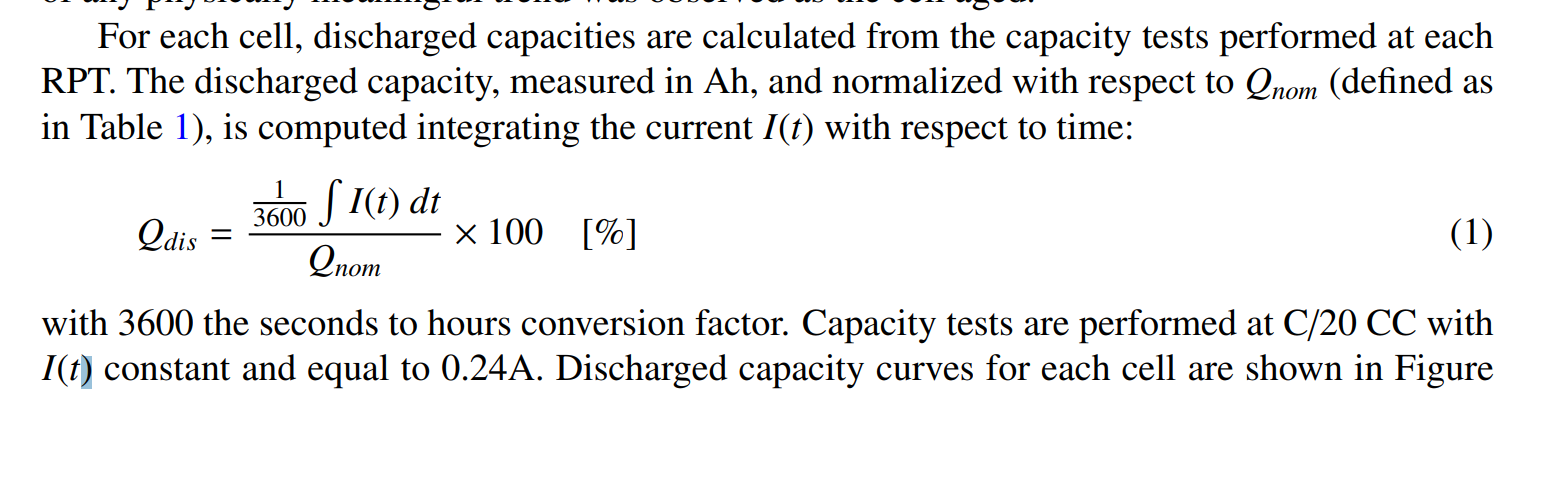

In [23]:
import os

# Create DataFrame for the LUT
lut = pd.DataFrame({
    'Time': time_pulse,
    'Voltage': voltage_pulse,
    'Current': current_pulse
})

print(lut.head())

output_folder = f"hppc_lut/{battery_label}"
output_file = os.path.join(output_folder, f"battery_{battery_label}_cycle_{cycle_number+1}_pulse_{pulse_number}_lut.csv")
os.makedirs(output_folder, exist_ok=True)
lut.to_csv(output_file, index=False)

   Time   Voltage   Current
0  3962  4.088157 -0.000000
1  3963  3.996721  2.660326
2  3964  3.993889  2.660339
3  3965  3.991668  2.660390
4  3966  3.989838  2.660357


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import re
import glob
import pybamm
import pybop

# ============================
# 1. Full Cycle SoC Computation
# ============================
def compute_soc(time, current, initial_soc, capacity):
    """
    Compute SoC over a cycle using coulomb counting.
    
    Args:
        time (np.array): Time vector in seconds.
        current (np.array): Current values in A.
        initial_soc (float): Initial state-of-charge (e.g. 1.0 for 100%).
        capacity (float): Battery capacity in A.h.
    
    Returns:
        np.array: SoC values at each time point.
    """
    soc = np.zeros(len(time), dtype=float)
    soc[0] = initial_soc
    # Compute dt (assumes uniform sampling; otherwise use np.diff(time))
    dt = np.diff(time, prepend=time[0])
    for i in range(1, len(time)):
        # dt converted from seconds to hours (dt/3600)
        soc[i] = soc[i-1] - (current[i-1] * dt[i] / 3600) / capacity
    return soc

def find_main_pulses(current, min_distance=1000, current_threshold=0.1):
    """
    Identify pulse start indices from the current data.
    
    Args:
        current (np.array): Current values.
        min_distance (int): Minimum separation (in indices) between pulses.
        current_threshold (float): Minimum change in current to detect a pulse.
    
    Returns:
        np.array: Array of pulse start indices.
    """
    all_changes = np.where(np.abs(np.diff(current)) > current_threshold)[0]
    main_pulses = []
    last_pulse = -min_distance
    for idx in all_changes:
        if idx - last_pulse >= min_distance:
            main_pulses.append(idx)
            last_pulse = idx
    return np.array(main_pulses)

# --- Load full cycle data from MAT file ---
mat = sio.loadmat('HPPC_test.mat')
battery_label = 'G1'
cycle_number = 1

# Select data for the specified battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell_cycle = np.array(mat['vcell'][cycle_number][col_index]).flatten()
current_cycle = np.array(mat['curr'][cycle_number][col_index]).flatten()

# Remove any NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices]
time_vector = np.arange(len(vcell_cycle))

# Compute SoC over the full cycle (assume initial SoC = 1.0 and capacity = 5 A.h)
initial_soc = 1.0
capacity = 5
soc_cycle = compute_soc(time_vector, current_cycle, initial_soc, capacity)

# Identify pulse start indices in the full cycle
pulse_starts = find_main_pulses(current_cycle)
print(f"Found {len(pulse_starts)} pulses in full cycle.")

# ============================
# 2. ECM Parameter Identification
# ============================
def parameterize_pulse(file_loc):
    """
    Run ECM parameter identification on a pulse CSV file.
    
    Args:
        file_loc (str): Path to the CSV file.
    
    Returns:
        tuple: Optimized parameters (R0, R1, R2, C1, C2).
    """
    df = pd.read_csv(file_loc, index_col=None, na_values=["NA"])
    df = df.drop_duplicates(subset=["Time"], keep="first")
    
    dataset = pybop.Dataset({
        "Time [s]": df["Time"].to_numpy(),
        "Current function [A]": df["Current"].to_numpy() * -1,  # sign adjusted if needed
        "Voltage [V]": df["Voltage"].to_numpy(),
    })
    
    # Setup the parameter values for the ECM
    parameter_set = pybamm.ParameterValues("ECM_Example")
    parameter_set.update({
        "Cell capacity [A.h]": 5,
        "Nominal cell capacity [A.h]": 5,
        "Element-1 initial overpotential [V]": 0,
        "Upper voltage cut-off [V]": 4.2,
        "Lower voltage cut-off [V]": 3.0,
        "R0 [Ohm]": 1e-3,
        "R1 [Ohm]": 2e-4,
        "C1 [F]": 1e4,
        "Open-circuit voltage [V]": pybop.empirical.Thevenin().default_parameter_values["Open-circuit voltage [V]"],
    })
    parameter_set.update({
        "R2 [Ohm]": 0.0003,
        "C2 [F]": 40000,
        "Element-2 initial overpotential [V]": 0,
    }, check_already_exists=False)
    
    # Build the model with two RC elements
    model = pybop.empirical.Thevenin(
        parameter_set=parameter_set,
        options={"number of rc elements": 2},
        solver=pybamm.CasadiSolver(mode="safe", dt_max=10),
    )
    model.build(initial_state={"Initial open-circuit voltage [V]": df["Voltage"].to_numpy()[0]})
    
    # Define parameters with their priors and bounds
    r_guess = 0.005
    parameters = pybop.Parameters(
        pybop.Parameter("R0 [Ohm]", prior=pybop.Gaussian(r_guess, r_guess / 10), bounds=[0, 0.2]),
        pybop.Parameter("R1 [Ohm]", prior=pybop.Gaussian(r_guess, r_guess / 10), bounds=[0, 0.2]),
        pybop.Parameter("R2 [Ohm]", prior=pybop.Gaussian(r_guess, r_guess / 10), bounds=[0, 0.2]),
        pybop.Parameter("C1 [F]", prior=pybop.Gaussian(500, 100), bounds=[1, 1500]),
        pybop.Parameter("C2 [F]", prior=pybop.Gaussian(2000, 500), bounds=[0, 25000]),
    )
    
    problem = pybop.FittingProblem(model, parameters, dataset)
    cost = pybop.SumSquaredError(problem)
    optim = pybop.PSO(cost, sigma0=[1e-3, 1e-3, 1e-3, 50, 500],
                       max_unchanged_iterations=30, max_iterations=100)
    
    results = optim.run()
    
    # Extract optimized parameters by index
    r0_opt = results.x[0]
    r1_opt = results.x[1]
    r2_opt = results.x[2]
    c1_opt = results.x[3]
    c2_opt = results.x[4]
    
    return r0_opt, r1_opt, r2_opt, c1_opt, c2_opt

# ============================
# 3. Extract Pulse Info from Filename
# ============================
def extract_pulse_info_from_filename(file_loc):
    """
    Extract the pulse index (and optionally temperature) from the CSV filename.
    
    Example filename: 'battery_G1_cycle_2_pulse_0_lut.csv'
    
    Returns:
        tuple: (pulse_index (int), temperature (float))
    """
    # Extract pulse index using regex
    match = re.search(r"pulse_(\d+)", file_loc)
    if match:
        pulse_idx = int(match.group(1))
    else:
        pulse_idx = None
    
    # If temperature is encoded in the file name (e.g., "T-20"), extract it.
    temp_match = re.search(r"T(-?\d+)", file_loc)
    if temp_match:
        temperature = float(temp_match.group(1))
    else:
        # Default temperature (or set a constant if you wish)
        temperature = -20
    return pulse_idx, temperature

# ============================
# 4. Loop Over Pulse CSV Files and Build LUTs
# ============================
# Adjust the glob path as needed.
pulse_files = sorted(glob.glob(r"hppc_lut/G1/battery_G1_cycle_2_pulse_*_lut.csv"))

# Prepare LUT lists (one per parameter)
R0_lut = []
R1_lut = []
R2_lut = []
C1_lut = []
C2_lut = []

for file_loc in pulse_files:
    try:
        r0_opt, r1_opt, r2_opt, c1_opt, c2_opt = parameterize_pulse(file_loc)
    except Exception as e:
        print(f"Error processing {file_loc}: {e}")
        continue
    
    # Read CSV to get a representative current (here, the first value)
    df_temp = pd.read_csv(file_loc)
    representative_current = df_temp["Current"].to_numpy()[0]
    
    # Extract pulse index and temperature from the file name
    pulse_idx, temperature = extract_pulse_info_from_filename(file_loc)
    
    # Map the pulse index (from CSV) to the full-cycle pulse start index to get the dynamic SoC
    if pulse_idx is not None and pulse_idx < len(pulse_starts):
        full_cycle_index = pulse_starts[pulse_idx]
        pulse_soc = soc_cycle[full_cycle_index]
    else:
        pulse_soc = np.nan  # Not available
    
    # Append the optimized parameters and operating conditions to each LUT
    R0_lut.append({
        "Temperature [degC]": temperature,
        "Current [A]": representative_current,
        "SoC": pulse_soc,
        "R0 [Ohm]": r0_opt,
    })
    R1_lut.append({
        "Temperature [degC]": temperature,
        "Current [A]": representative_current,
        "SoC": pulse_soc,
        "R1 [Ohm]": r1_opt,
    })
    R2_lut.append({
        "Temperature [degC]": temperature,
        "Current [A]": representative_current,
        "SoC": pulse_soc,
        "R2 [Ohm]": r2_opt,
    })
    C1_lut.append({
        "Temperature [degC]": temperature,
        "Current [A]": representative_current,
        "SoC": pulse_soc,
        "C1 [F]": c1_opt,
    })
    C2_lut.append({
        "Temperature [degC]": temperature,
        "Current [A]": representative_current,
        "SoC": pulse_soc,
        "C2 [F]": c2_opt,
    })

# Convert LUT lists to DataFrames and save them as CSV files
R0_df = pd.DataFrame(R0_lut)
R1_df = pd.DataFrame(R1_lut)
R2_df = pd.DataFrame(R2_lut)
C1_df = pd.DataFrame(C1_lut)
C2_df = pd.DataFrame(C2_lut)

R0_df.to_csv("R0_lut.csv", index=False)
R1_df.to_csv("R1_lut.csv", index=False)
R2_df.to_csv("R2_lut.csv", index=False)
C1_df.to_csv("C1_lut.csv", index=False)
C2_df.to_csv("C2_lut.csv", index=False)

print("Lookup tables generated and saved!")


Found 10 pulses in full cycle.
Halt: No significant change for 30 iterations.
OptimisationResult:
  Best result from 1 run(s).
  Initial parameters: [4.80670778e-03 5.66794253e-03 5.08703087e-03 5.34461255e+02
 1.76211937e+03]
  Optimised parameters: [3.58159108e-02 1.40600770e-03 8.58444765e-03 5.85086412e+02
 2.19905367e+03]
  Total-order sensitivities:
  Diagonal Fisher Information entries: None
  Final cost: 0.6488326964448797
  Optimisation time: 60.84619927406311 seconds
  Number of iterations: 52
  Number of evaluations: 321
  SciPy result available: No
  PyBaMM Solution available: Yes
Halt: No significant change for 30 iterations.
OptimisationResult:
  Best result from 1 run(s).
  Initial parameters: [4.86658752e-03 4.72531352e-03 5.15829506e-03 6.71704355e+02
 1.17740981e+03]
  Optimised parameters: [3.13021363e-02 1.05257959e-02 4.02780682e-03 1.01711781e+03
 1.31060564e+04]
  Total-order sensitivities:
  Diagonal Fisher Information entries: None
  Final cost: 0.0842556628133